In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

import sys
sys.path.append("../../scripts")
import importlib

import model
importlib.reload(model)
from model import Model, model_from_file

import model_plot
importlib.reload(model_plot)
from model_plot import model_plot

import norms
importlib.reload(norms)
from norms import norm_continuous, norm_L2

%matplotlib inline

In [3]:
powers = [
    (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13),
    (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13),
    (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13),
    (4, 9), (4, 10), (4, 11), (4, 12), (4, 13),
    (5, 11), (5, 12), (5, 13),
    (6, 13),
    (7, 15)
]
models = dict()
for i, j in powers:
    models[i, j] = model_from_file('convergence/values_{}_{}.csv'.format(i, j))

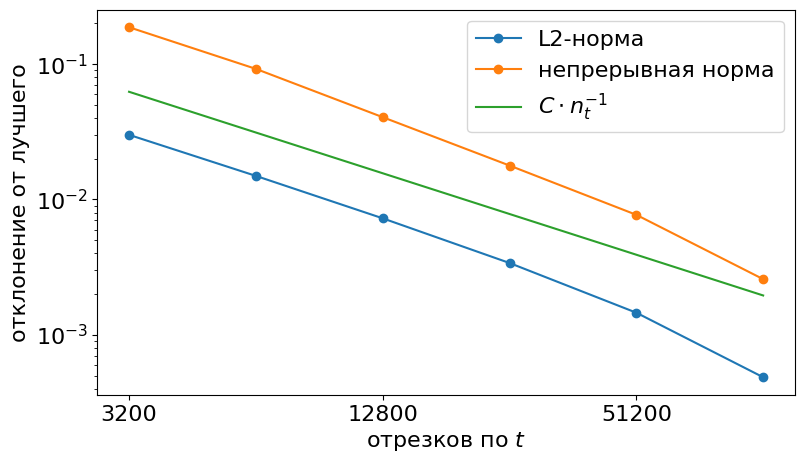

In [5]:
errors_x_3_L2 = [norm_L2(models[3, i], models[3, 13]) for i in range(7, 13)]
errors_x_3_continuous = [norm_continuous(models[3, i], models[3, 13]) for i in range(7, 13)]
plt.figure(figsize=(9, 5))
plt.xlabel('отрезков по $t$')
plt.xscale('log')
plt.xticks(ticks=50 * 4 ** np.arange(3, 6), labels=50 * 4 ** np.arange(3, 6))
plt.xticks(ticks=[], minor=True)
plt.ylabel('отклонение от лучшего')
plt.yscale('log')
plt.plot([25 * 2 ** i for i in range(7, 13)], errors_x_3_L2, '-o', color='C0')
plt.plot([25 * 2 ** i for i in range(7, 13)], errors_x_3_continuous, '-o', color='C1')
plt.plot(np.linspace(3200, 102400, 2), 200 / np.linspace(3200, 102400, 2), color='C2')
plt.legend(['L2-норма', 'непрерывная норма', '$C \cdot n_t^{-1}$'])
plt.show()

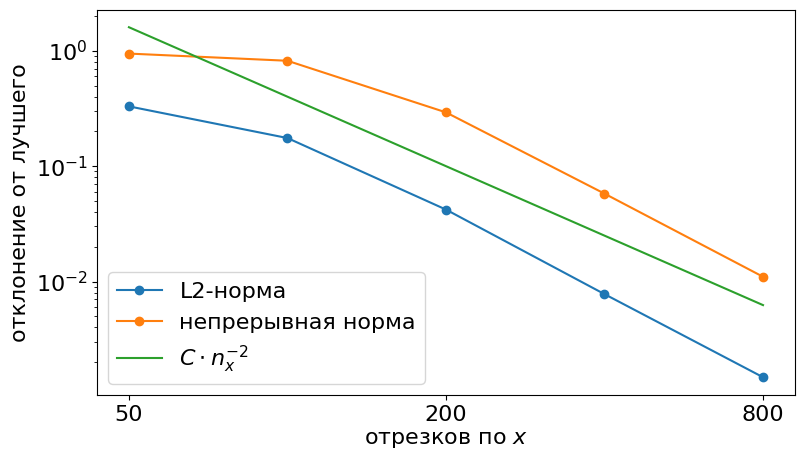

In [6]:
errors_t_13_L2 = [norm_L2(models[i, 13], models[6, 13]) for i in range(1, 6)]
errors_t_13_continuous = [norm_continuous(models[i, 13], models[6, 13]) for i in range(1, 6)]
plt.figure(figsize=(9, 5))
plt.xlabel('отрезков по $x$')
plt.xscale('log')
plt.xticks(ticks=50 * 4 ** np.arange(0, 3), labels=50 * 4 ** np.arange(0, 3))
plt.xticks(ticks=[], minor=True)
plt.ylabel('отклонение от лучшего')
plt.yscale('log')
plt.plot([25 * 2 ** i for i in range(1, 6)], errors_t_13_L2, '-o', color='C0')
plt.plot([25 * 2 ** i for i in range(1, 6)], errors_t_13_continuous, '-o', color='C1')
plt.plot(np.linspace(50, 800, 2), 4000 / np.linspace(50, 800, 2) ** 2, color='C2')
plt.legend(['L2-норма', 'непрерывная норма', '$C \cdot n_x^{-2}$'])
plt.show()

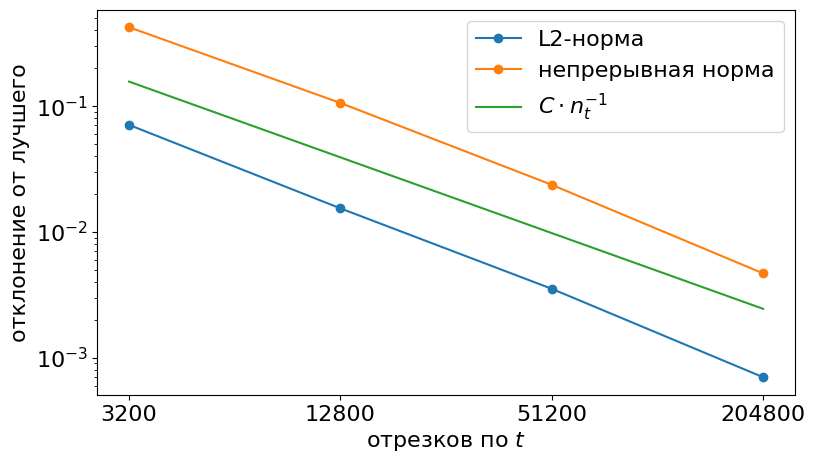

In [7]:
errors_L2 = [norm_L2(models[i, 2 * i + 1], models[7, 15]) for i in range(3, 7)]
errors_continuous = [norm_continuous(models[i, 2 * i + 1], models[7, 15]) for i in range(3, 7)]
plt.figure(figsize=(9, 5))
plt.xlabel('отрезков по $t$')
plt.xscale('log')
plt.xticks(ticks=50 * 4 ** np.arange(3, 7), labels=50 * 4 ** np.arange(3, 7))
plt.xticks(ticks=[], minor=True)
plt.ylabel('отклонение от лучшего')
plt.yscale('log')
plt.plot([25 * 2 ** (2 * i + 1) for i in range(3, 7)], errors_L2, '-o', color='C0')
plt.plot([25 * 2 ** (2 * i + 1) for i in range(3, 7)], errors_continuous, '-o', color='C1')
plt.plot(np.linspace(3200, 204800, 2), 500 / np.linspace(3200, 204800, 2), color='C2')
plt.legend(['L2-норма', 'непрерывная норма', '$C \cdot n_t^{-1}$'])
plt.show()